# 공공데이터를 활용한 서울시 아파트 실거래가 예측  - 201884052 이지혁
- 라이브러리 호출

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

- 2006~2020년 데이터 호출

In [3]:
filename='C:/Users/LEE_JI_HYEOK_V2/Documents/data/DAML/서울특별시_부동산_실거래가_정보_2020년.csv'
columns=['물건금액','건물주용도','건물면적','신고년도','법정동명','자치구명']
dtypes={'물건금액':'int','건물주용도':'object','건물면적':'float','신고년도':'int','법정동명':'object','자치구명':'object'}
df2020=pd.read_csv(filename, encoding='euc-kr', usecols=columns, dtype=dtypes, low_memory=False)
df2020.head()

,자치구명,법정동명,신고년도,건물면적,건물주용도,물건금액
0,성북구,장위동,2020,59.92,아파트,749000000
1,성북구,길음동,2020,84.77,아파트,1200000000
2,구로구,구로동,2020,36.90,아파트,105000000
3,용산구,산천동,2020,59.55,아파트,830000000
4,용산구,이촌동,2020,64.43,아파트,735000000


- info, value_counts, isna 활용 데이터 확인

In [4]:
df.info(memory_usage='deep')

NameError: name 'df' is not defined

In [ ]:
df['건물면적'].value_counts(dropna=False)

In [ ]:
df2020.isna().sum()

- concat으로 데이터 합친 후 apt로 다시 불러오기

In [5]:
temp = pd.concat([df2006,df2007,df2008,df2009, df2010,df2011,df2012,df2013,df2014,df2015,df2016,df2017,df2018,df2019,df2020],ignore_index=True)
temp

NameError: name 'df2006' is not defined

In [6]:
temp.to_csv('C:/Users/LEE_JI_HYEOK_V2/Documents/data/DAML/서울특별시_부동산_실거래가_정보_concat_cp949.csv', encoding='euc-kr', index=False)

NameError: name 'temp' is not defined

In [7]:
apt=pd.read_csv('C:/Users/LEE_JI_HYEOK_V2/Documents/data/DAML/서울특별시_부동산_실거래가_정보_concat_cp949.csv', encoding='euc-kr')
apt.head()

,자치구명,법정동명,신고년도,건물면적,건물주용도,물건금액
0,양천구,신정동,2006,59.83,아파트,215000000
1,강동구,천호동,2006,50.25,연립주택,135000000
2,양천구,목동,2006,77.17,아파트,273000000
3,강동구,길동,2006,111.51,아파트,425000000
4,양천구,신정동,2006,71.77,아파트,630000000


- 노원구 2006년 데이터 많음, 종로구, 중구 데이터는 전체적으로 적음

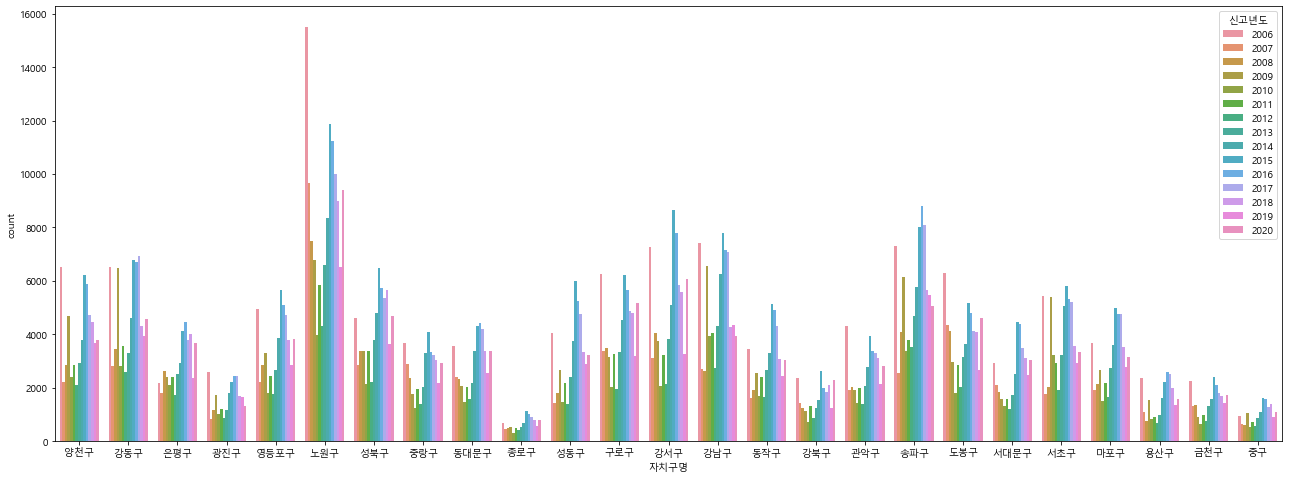

In [9]:
import matplotlib as mpl 
mpl.rc('font', family = 'Malgun Gothic')
plt.figure(figsize = [22,6])
sns.countplot(x="자치구명", hue="신고년도", data=apt)
sns.set(style='whitegrid')
plt.show()

- 건물면적 수, 65, 85, 110정도의 크기에 주로 분포

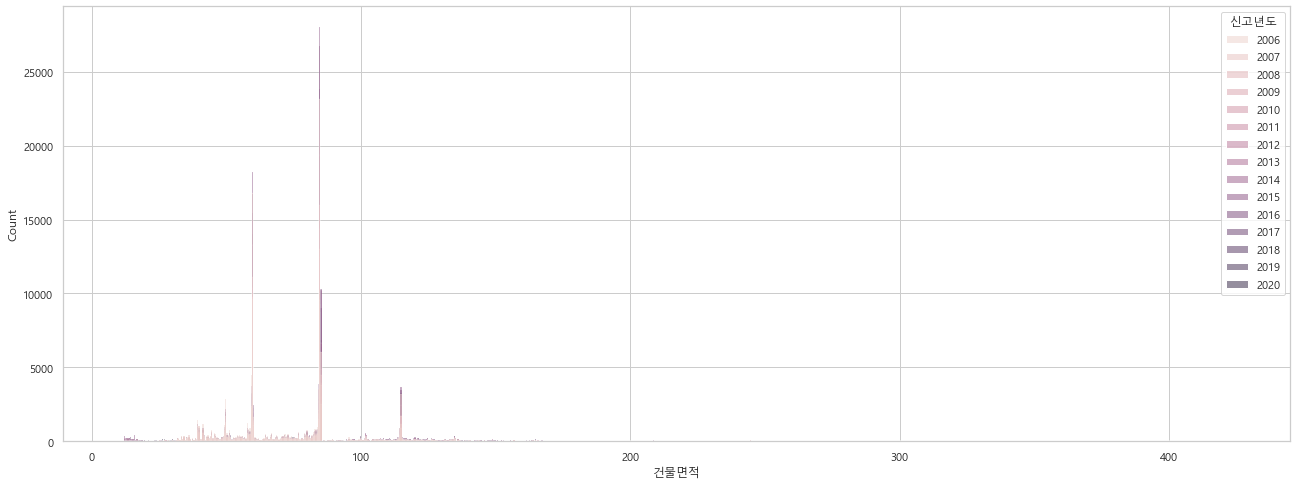

In [10]:
import matplotlib as mpl 
mpl.rc('font', family = 'Malgun Gothic')
plt.figure(figsize = [22,8])
sns.histplot(x="건물면적",hue="신고년도", data=apt)
sns.set(style='whitegrid')
plt.show()

- 과거일 수록 낮은 가격에 count 확인

C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


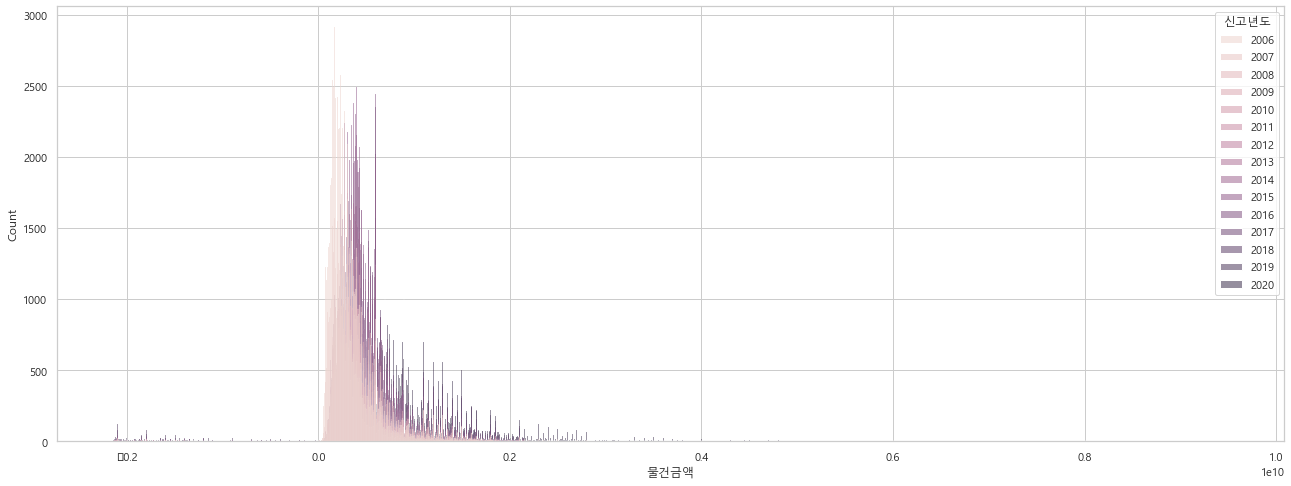

In [11]:
import matplotlib as mpl 
mpl.rc('font', family = 'Malgun Gothic')
plt.figure(figsize = [22,8])
sns.histplot(x="물건금액",hue="신고년도", data=apt)
sns.set(style='whitegrid')
plt.show()

- 물건금액과 건물면적의 정규분포가 오른쪽 꼬리가 긴 형태. 집이 싸고 저렴한것이 주로 거래됨.

<Figure size 1584x576 with 0 Axes>

C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


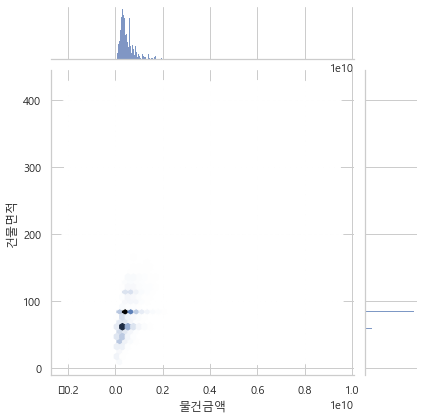

In [15]:
import matplotlib as mpl 
mpl.rc('font', family = 'Malgun Gothic')
plt.figure(figsize = [22,8])
sns.jointplot(x='물건금액',y='건물면적',kind='hex',data=apt)
plt.show()

- 박스플롯으로 확인. 건물면적과 물건금액이 짜잘하게 많은 값이 존재함을 볼 수 있음

C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


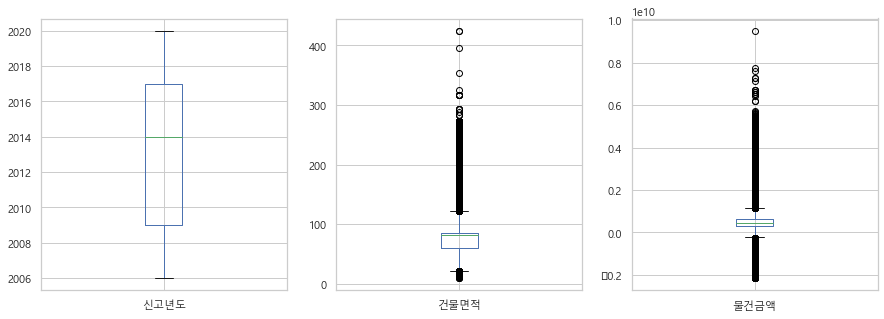

In [25]:
apt.plot(kind='box', subplots=True, figsize=(15,5))
plt.show()

- 연속성 데이터들의 히트맵, 큰 상관관계는 보이지 않음.

<AxesSubplot:>

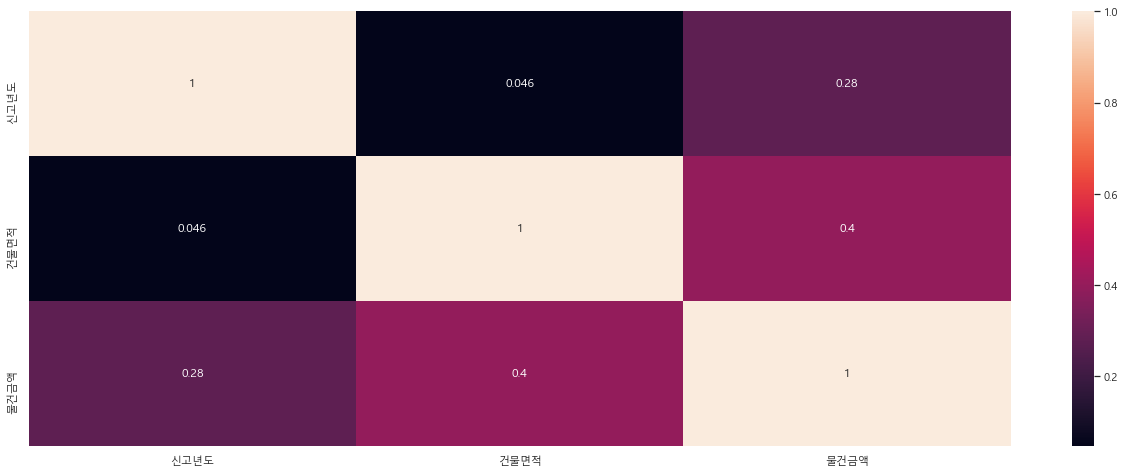

In [12]:
import matplotlib as mpl 
mpl.rc('font', family = 'Malgun Gothic')
plt.figure(figsize = [22,8])
sns.heatmap(apt.corr(),annot=True)

- 물건금액과 건물면적의 회귀선. 왼쪽에 많이 편향된 것을 볼 수 있음. 서울에서 변두리 지역일 것이라고 생각됨.

C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 1584x576 with 0 Axes>

C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


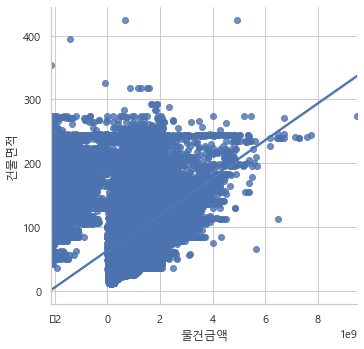

In [14]:
import matplotlib as mpl 
mpl.rc('font', family = 'Malgun Gothic')
plt.figure(figsize = [22,8])
sns.lmplot(x='물건금액', y='건물면적', height=5, data=apt)
#plt.ylim(0,150)
plt.show()

- 위와 비슷한 그래프

C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


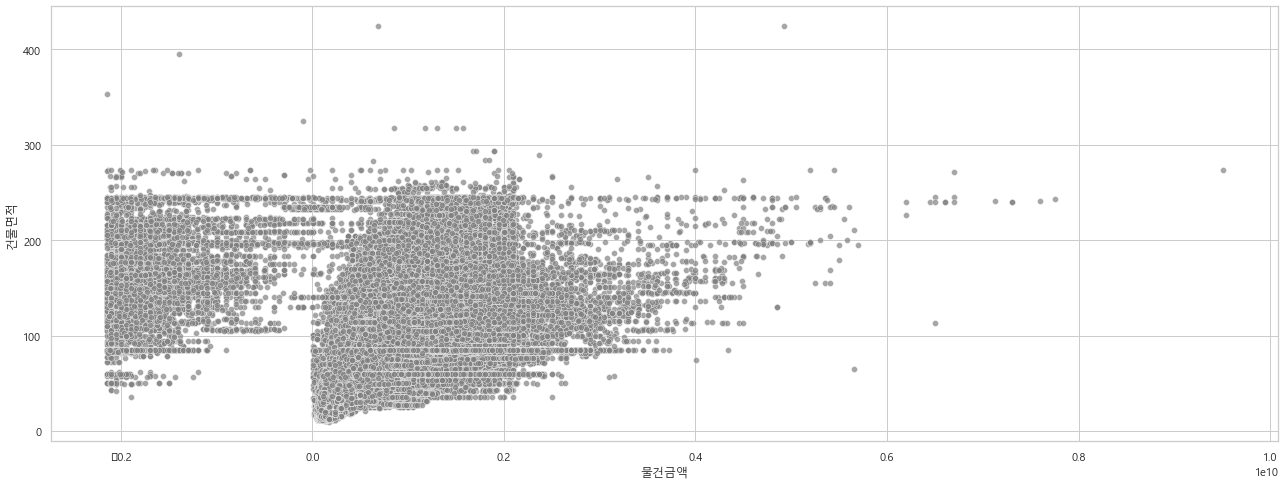

In [13]:
x=apt["물건금액"] 
y=apt["건물면적"]
#area = x * y/15
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic')
plt.figure(figsize = [22,8])
sns.scatterplot(x, y, 
                color='gray', alpha=0.7)
plt.show()

- 건물주용도가 아파트 인것을 필터함. 연립주택, 오피스텔, 단독주택 등이 있었음.

In [8]:
apt = apt.loc[apt['건물주용도']=='아파트',:].drop('건물주용도',axis=1)
apt

,자치구명,법정동명,신고년도,건물면적,물건금액
0,양천구,신정동,2006,59.83,215000000
2,양천구,목동,2006,77.17,273000000
3,강동구,길동,2006,111.51,425000000
4,양천구,신정동,2006,71.77,630000000
6,양천구,신정동,2006,84.63,249000000
...,...,...,...,...,...
2261679,마포구,염리동,2020,58.71,626000000
2261686,마포구,공덕동,2020,113.67,1330000000
2261688,마포구,성산동,2020,82.01,560000000
2261690,마포구,성산동,2020,84.98,600000000


- 머신러닝 분석을 위해서 MinMaxScaler로 수치형 데이터들을 스케일링하였고 자치구명은 겟 더미스로 원핫엔코딩을 하고 apt2로 합침.

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
a=MinMaxScaler().fit_transform(apt[['건물면적']])
b=MinMaxScaler().fit_transform(apt[['물건금액']])
c=pd.get_dummies(apt['자치구명'])
apt2 = pd.concat([apt,c],axis=1)
apt2['건물면적2']=MinMaxScaler().fit_transform(apt[['건물면적']])
apt2['물건금액2']=MinMaxScaler().fit_transform(apt[['물건금액']])
apt2

,자치구명,법정동명,신고년도,건물면적,물건금액,강남구,강동구,강북구,강서구,관악구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,건물면적2,물건금액2
0,양천구,신정동,2006,59.83,215000000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.120227,0.202803
2,양천구,목동,2006,77.17,273000000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.162081,0.207783
3,강동구,길동,2006,111.51,425000000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.244967,0.220833
4,양천구,신정동,2006,71.77,630000000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.149047,0.238434
6,양천구,신정동,2006,84.63,249000000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.180087,0.205722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261679,마포구,염리동,2020,58.71,626000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.117524,0.238091
2261686,마포구,공덕동,2020,113.67,1330000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.250181,0.298535
2261688,마포구,성산동,2020,82.01,560000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.173763,0.232424
2261690,마포구,성산동,2020,84.98,600000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.180932,0.235858


In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x=MinMaxScaler().fit_transform(apt[['건물면적']])
x.min(),x.max()

(0.0, 0.9999999999999999)

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x=StandardScaler().fit_transform(apt[['건물면적']])
x.mean(),x.std()

(-2.5082985963396444e-15, 1.0000000000000002)

- Y값을 분리시켜 타겟값 데이터로 만들고 변환된 데이터들만 X에 넣어서 학습 준비시킴.

In [59]:
X=apt2.drop(['자치구명','법정동명','신고년도','건물면적','물건금액'],axis=1)
X

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,건물면적2,물건금액2
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.120227,0.202803
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.162081,0.207783
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.244967,0.220833
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.149047,0.238434
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.180087,0.205722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.117524,0.238091
2261686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.250181,0.298535
2261688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.173763,0.232424
2261690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.180932,0.235858


In [71]:
y=apt2['물건금액']
y

0           215000000
2           273000000
3           425000000
4           630000000
6           249000000
              ...    
2261679     626000000
2261686    1330000000
2261688     560000000
2261690     600000000
2261703     800000000
Name: 물건금액, Length: 1229594, dtype: int64

- 사이킷런 라이브러리를 불러와서 학습을 시키려는데 Unable to allocate 272. GiB for an array with shape (1229594, 29724) and data type int64
- 오류가 뜨면서 컴퓨팅 파워가 부족. 추후 코랩으로 작업할 생각임.

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [83]:
knn = KNeighborsClassifier(n_neighbors=3)
svc_classifier = SVC(kernel='linear', gamma=10, C=1.0)

In [ ]:
model = LogisticRegression()
knn.fit(X, y)

In [77]:
 X_test 

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,건물면적2,물건금액2
623880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.311996,0.228990
802959,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.093990,0.204778
572913,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.075501,0.199901
1455195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.180883,0.244444
1614072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.179363,0.245303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551473,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.253850,0.281793
1614014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.306855,0.242298
958748,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0.232440,0.215252
673392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.379339,0.307121


In [ ]:
svc_classifier.fit(X,y)

In [78]:
model = LogisticRegression()
model.fit(X, y)

MemoryError: Unable to allocate 272. GiB for an array with shape (1229594, 29724) and data type int64

# 마무리하며
- 남은 기간 동안에 데이터 분석 기법을 한 번 씩 적용해보며 최적의 알고리즘을 골라내고, Hyper parameter 최적화등을 진행하겠습니다.